<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos, denominado `vehiculos_procesado_con_grupos.csv`, contiene algunas de las características más importantes de los vehículos. El objetivo de este ejercicio es clasificar los vehículos en diferentes categorías, basándonos en las características que se describen a continuación.

El desafío de este ejercicio radica en la combinación de variables numéricas y categóricas, lo que añade complejidad al análisis.

Lo primero que haremos será cargar el conjunto de datos:

**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [5]:
#datos numericos
datos_numericos=df.select_dtypes(include=['float64'])
datos_numericos=datos_numericos.fillna(datos_numericos.mean())
scaler=MinMaxScaler()
datos_numericos_normalizados=scaler.fit_transform(datos_numericos)
datos_numericos_normalizados=pd.DataFrame(datos_numericos_normalizados, columns=datos_numericos.columns)
#datos categoricos
datos_categoricos=df.select_dtypes(include=['object'])
datos_categoricos=pd.get_dummies(datos_categoricos)
#juntar
df_procesado=pd.concat([datos_numericos_normalizados,datos_categoricos],axis=1)
new_col=[]
for col in df_procesado.columns:
  col=col.lower()
  col=col.replace(" ","_")
  col= unicodedata.normalize('NFKD', col).encode('ascii', 'ignore').decode('ascii')
  new_col.append(col)
df_procesado.columns=new_col
df_procesado.head()

,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_camionetas,clase_tipo_coche_familiar,clase_tipo_coches_grandes,clase_tipo_coches_medianos,clase_tipo_coches_pequenos,clase_tipo_deportivos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy_alto,consumo_tipo_muy_bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy_alto,co2_tipo_muy_bajo
0,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False


´get_dummies' basicamente crea una nueva columna por cada valor categorico y llena esta columna con 0 o 1 o True o False si el dato corresponde a la categoria.

### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [6]:
kmeans=KMeans(n_clusters=8,n_init=25,random_state=123)
kmeans.fit(df_procesado)
centroids=kmeans.cluster_centers_
clusters=kmeans.labels_
df_procesado['cluster']=clusters
df_procesado['cluster']=df_procesado['cluster'].astype('category')

cluster_summaries = {}
for i in range(8):
    cluster_data = df_procesado[clusters == i]  # Filtrar datos por cluster
    numerical_means = cluster_data.select_dtypes(include=['number']).mean()  # Promedio de variables numéricas
    categorical_modes = cluster_data.select_dtypes(include=['object','category']).mode().iloc[0]  # Moda de variables categóricas
    cluster_summaries[i] = {
        'numerical_means': numerical_means,
        'categorical_modes': categorical_modes
    }
for cluster, summary in cluster_summaries.items():
    print(f"Cluster {cluster}:")
    print("Promedio de variables numéricas:")
    print(summary['numerical_means'])

Cluster 0:
Promedio de variables numéricas:
desplazamiento          0.585590
cilindros               0.430797
co2                     0.510289
consumo_litros_milla    0.454503
dtype: float64
Cluster 1:
Promedio de variables numéricas:
desplazamiento          0.334035
cilindros               0.258127
co2                     0.354211
consumo_litros_milla    0.281400
dtype: float64
Cluster 2:
Promedio de variables numéricas:
desplazamiento          0.236153
cilindros               0.157991
co2                     0.257461
consumo_litros_milla    0.172659
dtype: float64
Cluster 3:
Promedio de variables numéricas:
desplazamiento          0.250916
cilindros               0.195881
co2                     0.304474
consumo_litros_milla    0.226879
dtype: float64
Cluster 4:
Promedio de variables numéricas:
desplazamiento          0.148941
cilindros               0.142350
co2                     0.236470
consumo_litros_milla    0.151675
dtype: float64
Cluster 5:
Promedio de variables numéricas:
d

Dada la cantidad de datos que se tiene es dificil identificar tendencias solo con 8 clusters, pues, son 36 categorias de 36791. Veamos mas adelante si aumentando los cluster esto se hace mas facil.

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

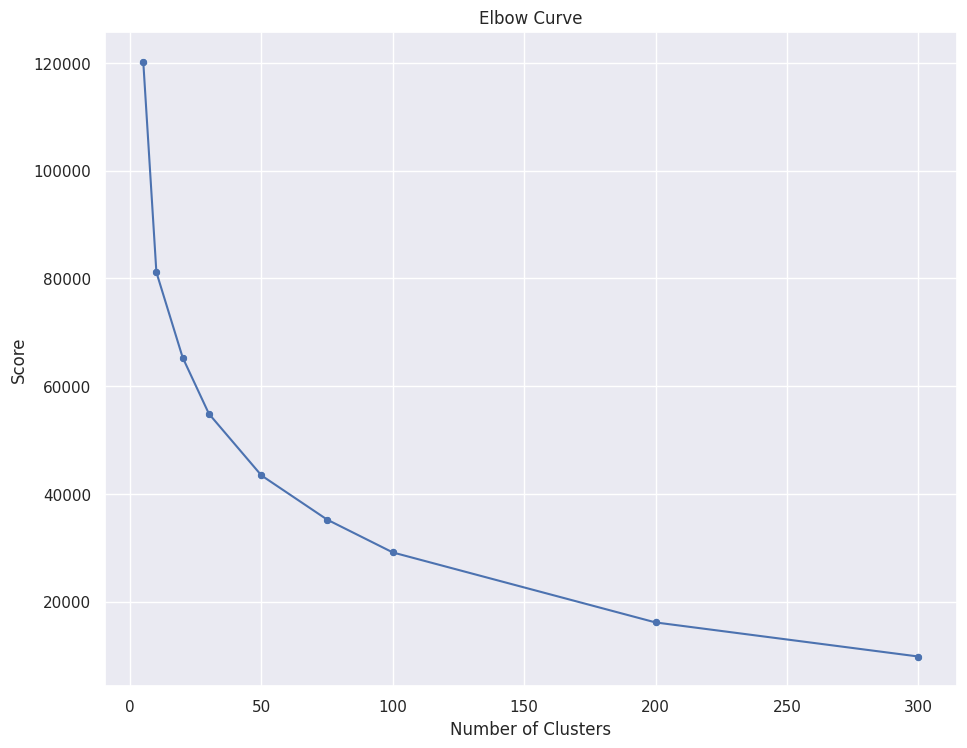

In [9]:
rango_clusters=[5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i, n_init=10) for i in rango_clusters]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

df_Elbow = pd.DataFrame({'Number of Clusters': rango_clusters, 'Score': score})

df_Elbow.head()

fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

**Respuesta** Dado el grafico, si bien 200 clusters es una buena medida, se perderia todo el proposito de hacer clusters, pues, seran demasiados y graficarlos sera poco indicativo. Dicho esto, podriamos escoger clusters cerca de donde se dobla el codo. Esto es, cerca 80 clusters

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [11]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

**ANALISIS ESTADISTICO**

In [15]:
#Analisis estadistico
print('Media de cada categoria')
iris.mean(axis=0)

Media de cada categoria


,0
sepal_length,5.843333
sepal_width,3.057333
petal_length,3.758000
petal_width,1.199333
species,1.000000


Notemos que las medias no estan tan alejadas entre sí. Además, el ancho del sepalo es casi 3 veces mas pequeño que el el ancho del petalo.

In [16]:
print('Desviacion estandar de cada categoria')
iris.std(axis=0)

Desviacion estandar de cada categoria


,0
sepal_length,0.828066
sepal_width,0.435866
petal_length,1.765298
petal_width,0.762238
species,0.819232


Igual que que la media, las desviaciónes estandar no distan entre si demasiado. A lo mucho, lo hace en un orden de magnitud.
Así, no es necesario estandarizacion de las categorias, pero se hará de todas formas.

**ALGORITMO PCA**

In [28]:
X=iris.drop('species',axis=1)
y=iris['species'] #no se separan entre datos para entrenar y comparar, pues, son pocos
#Entrenamiento de modelo
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)
modelo_pca = pca_pipe.named_steps['pca']
print(f"Hay tales dimensiones: {modelo_pca.n_components_}")

Hay tales dimensiones: 4


In [31]:
#
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,sepal_length,sepal_width,petal_length,petal_width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,0.719566,-0.244382,-0.142126,-0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


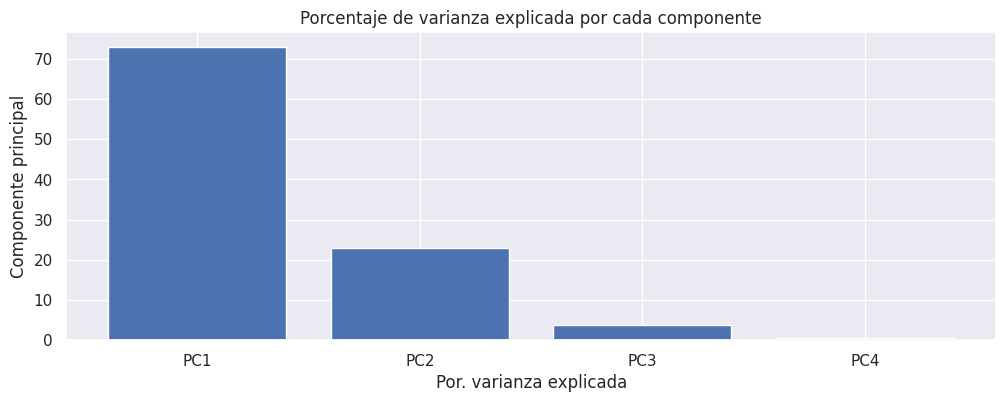

In [32]:
#grafico para determinar que componente se lleva la mayor varianza
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

Del grafico es claro que la primera componente se lleva la mayoria de la varianza, un 73%. Lo que implica que la relacion entre el el largo del sepalo y petalo es mas significativo que el ancho.

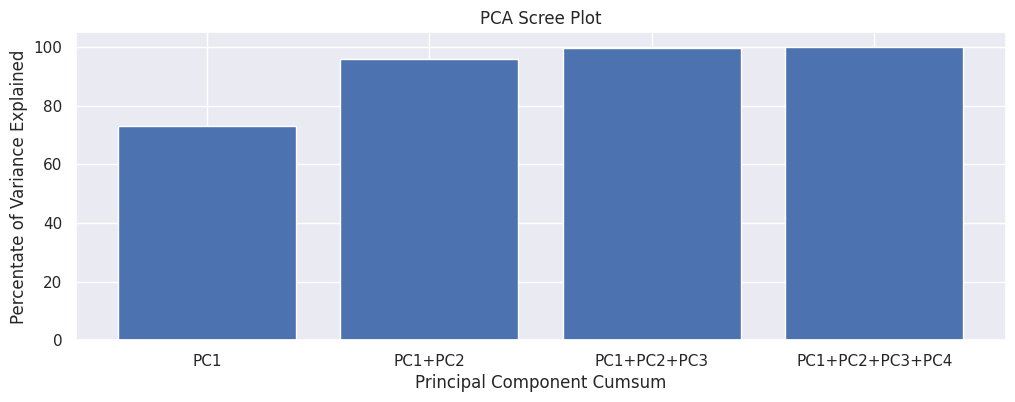

In [33]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Como era de esperarse del grafico anterior. Solo basta tener en cuenta las primeras 2 componentes principales, pues, el resto aporta poco al total. Si se escoge las primeras dos recuperamos el 95% de la varianza observada.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


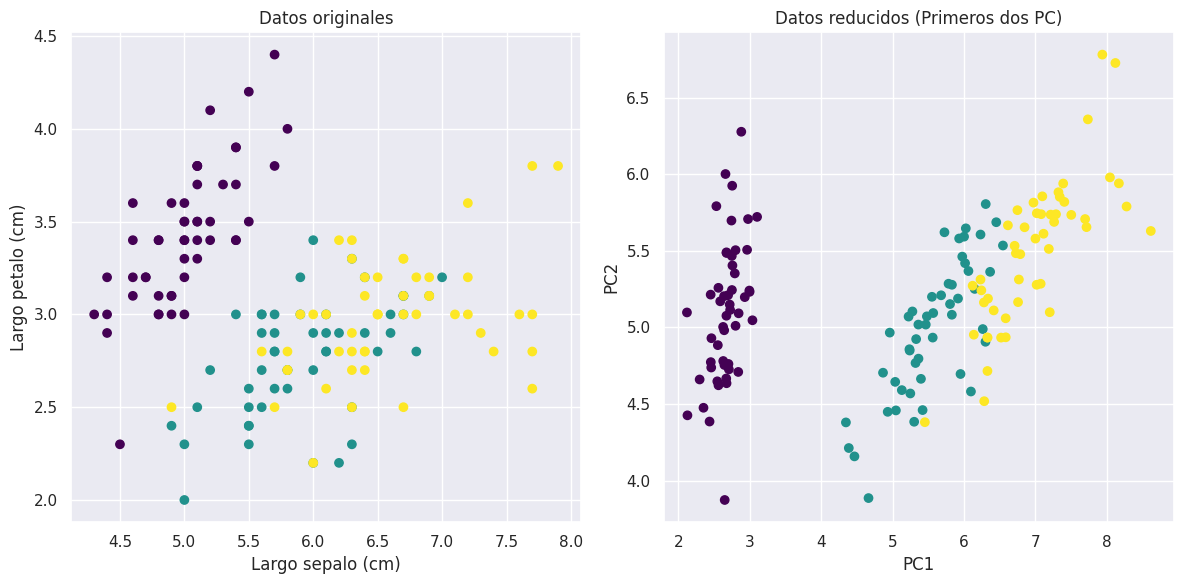

In [36]:
reduced_data = modelo_pca.transform(X)[:, :2] #seleccionar los primeros 2 pc
reduced_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')  # Assuming first two features of X
plt.title('Datos originales')
plt.xlabel('Largo sepalo (cm)') # Replace with the actual feature name
plt.ylabel('Largo petalo (cm)') # Replace with the actual feature name

# Reduced Data
plt.subplot(1, 2, 2)
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=y, cmap='viridis')
plt.title('Datos reducidos (Primeros dos PC)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

**Conclusiones:** Podemos notar que luego de reducir los datos y escoger las PC con menor distancia respecto a la varianza, se tiene que las categorias se diferencia mucho mas entre si. Sobre todo entre las dos ultimas especies. En el grafico original los datos de estas dos estaban muy erca entre si y no se podria distinguir a priori cual es cual. Sin embargo, en el segundo grafico sabemos el rango de Setosa y de Virginica.

**ALGORITMO TSNE**

Como en el algoritmo anterior se utilizo una reduccion a 2 dimensiones, se partirá con lo mismo en tSNE

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = y

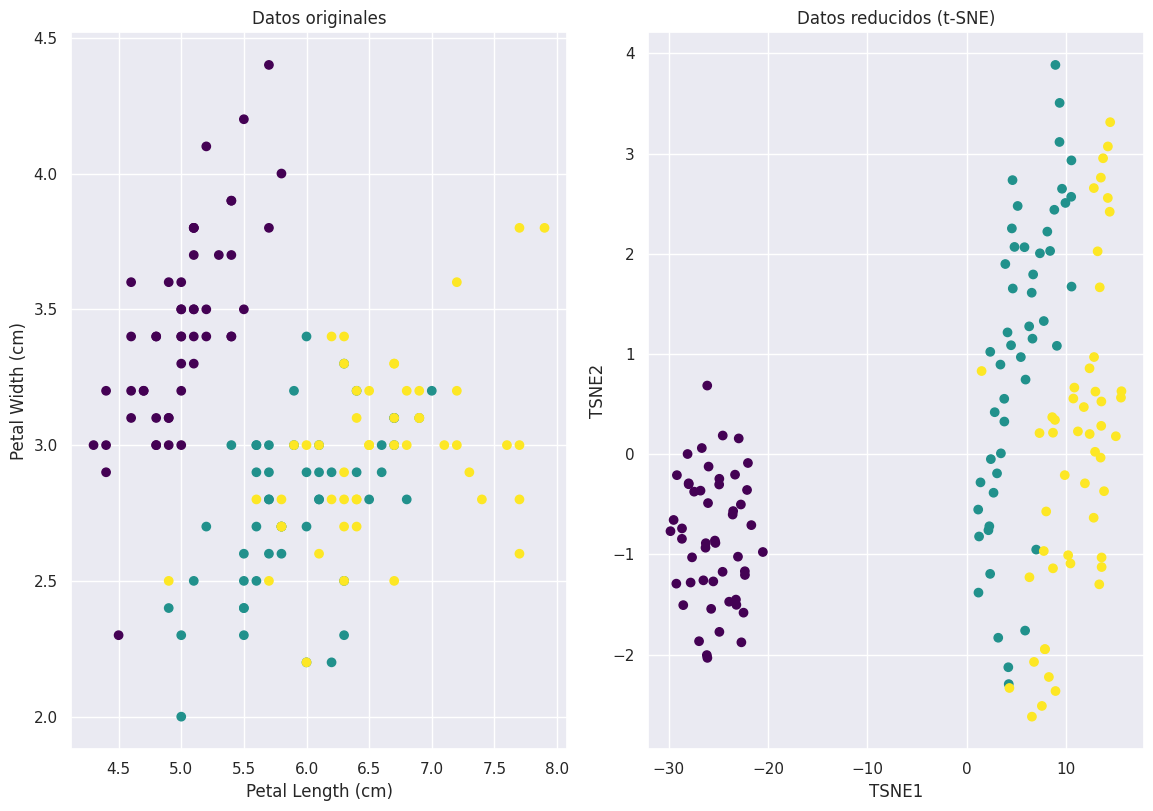

In [45]:
#grafico para comparar
# Original Data
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')  # Petal length and width for original data
plt.title('Datos originales')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Reduced Data (t-SNE)
plt.subplot(1, 2, 2)
plt.scatter(df_tsne['_DIM_1_'], df_tsne['_DIM_2_'], c=y, cmap='viridis')
plt.title('Datos reducidos (t-SNE)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

plt.tight_layout()
plt.show()

**Conclusiones:** A diferencia de PCA, sTNE ofrece una mejor separacion entre los datos, es decir, ahora existe, en el segundo grafico, una clara separacion entre las dos ultimas especies. Aun asi, en PCA no habian datos cruzados. Note que hay un punto amarillo en la franja azul, es decir, se coló una especie en la otra.